<a href="https://colab.research.google.com/github/SALSABIL-MEKKY/BMS-701-ML/blob/main/src.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
# Mounting drive to google colab
from google.colab import drive
drive.mount('/content/drive')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


# Importing Packages and Directory

In [2]:
# Importing all packages and setting directory
import os
import numpy as np
import pandas as pd
from sklearn.preprocessing import StandardScaler, LabelEncoder
from sklearn.feature_selection import VarianceThreshold
from sklearn.model_selection import train_test_split, GridSearchCV, RandomizedSearchCV
from sklearn.decomposition import PCA
from sklearn.semi_supervised import LabelSpreading
from sklearn.metrics import accuracy_score, balanced_accuracy_score, f1_score, classification_report, ConfusionMatrixDisplay
from sklearn.linear_model import LogisticRegression
import umap, matplotlib.pyplot as plt
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier
from sklearn.svm import SVC
from xgboost import XGBClassifier

os.chdir("/content/drive/MyDrive/ML_Project/phageleads_data")

# Data Cleaning

In [3]:
# Loading data and inspecting structure
df = pd.read_csv("Final_training_df_concat.csv", sep="\t")
print(df.shape)
df.head()

(158741, 1582)


,name,labels_in_parA,labels_in_integrase,labels_in_cro,labels_in_antirepressor,labels_in_immunity_repressor,PROSITE:ASX_HYDROXYL,PROSITE:PHOSPHOPANTETHEINE,PROSITE:EF_HAND_1,PROSITE:EGF_1,...,RED_TRIPEP:SSA,RED_TRIPEP:SSC,RED_TRIPEP:SSE,RED_TRIPEP:SSF,RED_TRIPEP:SSG,RED_TRIPEP:SSH,RED_TRIPEP:SSK,RED_TRIPEP:SSL,RED_TRIPEP:SSP,RED_TRIPEP:SSS
0,AAF75025|cluster_antirepressor_antirepressor|a...,0,0,0,1,0,0,0,0,0,...,0.00000,0.000000,0.000000,0.000000,0.000000,0.0,0.0,0.000000,0.0,0.000000
1,AAF75059|cluster_antirepressor_antirepressor|a...,0,0,0,1,0,0,0,0,0,...,0.00000,0.000000,0.003333,0.003333,0.000000,0.0,0.0,0.003333,0.0,0.000000
2,AAL15047|cluster_antirepressor_antirepressor|a...,0,0,0,1,0,0,0,0,0,...,0.00000,0.004132,0.004132,0.000000,0.000000,0.0,0.0,0.000000,0.0,0.004132
3,AAN07972|cluster_antirepressor_antirepressor|a...,0,0,0,1,0,0,0,0,0,...,0.00000,0.000000,0.003003,0.000000,0.003003,0.0,0.0,0.003003,0.0,0.000000
4,ABA42723|cluster_antirepressor_antirepressor|a...,0,0,0,1,0,0,0,0,0,...,0.00369,0.000000,0.000000,0.000000,0.000000,0.0,0.0,0.000000,0.0,0.000000


In [4]:
# Calculating summary statistics
df.describe()

,labels_in_parA,labels_in_integrase,labels_in_cro,labels_in_antirepressor,labels_in_immunity_repressor,PROSITE:ASX_HYDROXYL,PROSITE:PHOSPHOPANTETHEINE,PROSITE:EF_HAND_1,PROSITE:EGF_1,PROSITE:HOMEOBOX_1,...,RED_TRIPEP:SSA,RED_TRIPEP:SSC,RED_TRIPEP:SSE,RED_TRIPEP:SSF,RED_TRIPEP:SSG,RED_TRIPEP:SSH,RED_TRIPEP:SSK,RED_TRIPEP:SSL,RED_TRIPEP:SSP,RED_TRIPEP:SSS
count,158741.000000,158741.000000,158741.000000,158741.000000,158741.000000,158741.0,158741.000000,158741.000000,158741.000000,158741.000000,...,158741.000000,158741.000000,158741.000000,158741.000000,158741.000000,158741.000000,158741.000000,158741.000000,158741.000000,158741.000000
mean,0.000491,0.013714,0.003881,0.004580,0.004693,0.0,0.000611,0.001235,0.000019,0.000063,...,0.001150,0.000114,0.002850,0.001338,0.001222,0.000224,0.001516,0.003315,0.000697,0.001641
std,0.022161,0.116302,0.062173,0.067519,0.068346,0.0,0.024712,0.035117,0.004347,0.007937,...,0.002365,0.000838,0.003817,0.002560,0.002587,0.001049,0.002734,0.004171,0.001793,0.002992
min,0.000000,0.000000,0.000000,0.000000,0.000000,0.0,0.000000,0.000000,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,0.000000,0.000000,0.000000,0.000000,0.000000,0.0,0.000000,0.000000,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
50%,0.000000,0.000000,0.000000,0.000000,0.000000,0.0,0.000000,0.000000,0.000000,0.000000,...,0.000000,0.000000,0.001575,0.000000,0.000000,0.000000,0.000000,0.002193,0.000000,0.000000
75%,0.000000,0.000000,0.000000,0.000000,0.000000,0.0,0.000000,0.000000,0.000000,0.000000,...,0.001616,0.000000,0.004695,0.002058,0.001727,0.000000,0.002481,0.005415,0.000000,0.002564
max,1.000000,1.000000,1.000000,1.000000,1.000000,0.0,1.000000,1.000000,1.000000,1.000000,...,0.035088,0.028571,0.046512,0.041667,0.038462,0.029412,0.057692,0.061856,0.060000,0.054054


In [5]:
# Identifying data types
df.dtypes.value_counts()

,count
float64,1542
int64,39
object,1


In [6]:
# Inspecting NaN values
df.isna().sum().sum()

np.int64(0)

In [7]:
# Inspecting duplicated rows
df.duplicated().sum()

np.int64(0)

In [8]:
# Exctracting phage IDs from the name column
phage_ids = df["name"].str.split("|").str[5]
df.insert(0, "phage_id", phage_ids)

# Calculating proteins/phage metrics
proteins_per_phage = df.groupby("phage_id").size()

print("Min proteins/phage:", proteins_per_phage.min())
print("Max proteins/phage:", proteins_per_phage.max())
print("Mean proteins/phage:", proteins_per_phage.mean())

Min proteins/phage: 1
Max proteins/phage: 133
Mean proteins/phage: 22.182923420905535


# Feature Aggregation

In [9]:
# Assigning features that will be aggregated by summing
sum_cols = [c for c in df.columns
            if c.startswith("labels_in_") or c.startswith("PROSITE:")]

# Assigning metadata columns
meta_cols = ["phage_id", "name"]

# Assigning features that will be aggregated by averaging
mean_cols = [c for c in df.columns
             if c not in sum_cols + meta_cols]

agg_dict = {}

for c in sum_cols:
    agg_dict[c] = "sum"

for c in mean_cols:
    agg_dict[c] = "mean"

# Aggregating all features
phage_features = df.groupby("phage_id").agg(agg_dict).reset_index()
phage_features = phage_features.set_index("phage_id")

print(phage_features.shape)
phage_features.head()

(7156, 1581)


,labels_in_parA,labels_in_integrase,labels_in_cro,labels_in_antirepressor,labels_in_immunity_repressor,PROSITE:ASX_HYDROXYL,PROSITE:PHOSPHOPANTETHEINE,PROSITE:EF_HAND_1,PROSITE:EGF_1,PROSITE:HOMEOBOX_1,...,RED_TRIPEP:SSA,RED_TRIPEP:SSC,RED_TRIPEP:SSE,RED_TRIPEP:SSF,RED_TRIPEP:SSG,RED_TRIPEP:SSH,RED_TRIPEP:SSK,RED_TRIPEP:SSL,RED_TRIPEP:SSP,RED_TRIPEP:SSS
phage_id,,,,,,,,,,,,,,,,,,,,,
AB008550,0,1,0,0,0,0,0,0,0,0,...,0.002571,0.0,0.002571,0.000000,0.002571,0.000000,0.005141,0.000000,0.000000,0.005141
AB009866,0,1,0,0,0,0,0,0,0,0,...,0.000258,0.0,0.004653,0.002078,0.001628,0.000612,0.002976,0.003150,0.000000,0.000913
AB016282,0,1,0,0,1,0,0,0,0,0,...,0.000000,0.0,0.001055,0.000000,0.000000,0.000000,0.000000,0.004527,0.000000,0.001055
AB044554,0,1,0,1,0,0,0,0,0,0,...,0.001575,0.0,0.002950,0.001872,0.000000,0.000000,0.002840,0.001127,0.001006,0.000600
AB045978,0,1,0,1,0,0,0,0,0,0,...,0.000700,0.0,0.004502,0.003137,0.000532,0.000666,0.002363,0.002121,0.000000,0.001110


In [10]:
# Saving dataframe
phage_features.to_csv('phage_features.csv')
print("Wrote phage features file to phage_features.csv")

Wrote phage features file to phage_features.csv


In [11]:
# CHECKPOINT

df = pd.read_csv('phage_features.csv')
print(df.shape)
df.head()

(7156, 1582)


,phage_id,labels_in_parA,labels_in_integrase,labels_in_cro,labels_in_antirepressor,labels_in_immunity_repressor,PROSITE:ASX_HYDROXYL,PROSITE:PHOSPHOPANTETHEINE,PROSITE:EF_HAND_1,PROSITE:EGF_1,...,RED_TRIPEP:SSA,RED_TRIPEP:SSC,RED_TRIPEP:SSE,RED_TRIPEP:SSF,RED_TRIPEP:SSG,RED_TRIPEP:SSH,RED_TRIPEP:SSK,RED_TRIPEP:SSL,RED_TRIPEP:SSP,RED_TRIPEP:SSS
0,AB008550,0,1,0,0,0,0,0,0,0,...,0.002571,0.0,0.002571,0.000000,0.002571,0.000000,0.005141,0.000000,0.000000,0.005141
1,AB009866,0,1,0,0,0,0,0,0,0,...,0.000258,0.0,0.004653,0.002078,0.001628,0.000612,0.002976,0.003150,0.000000,0.000913
2,AB016282,0,1,0,0,1,0,0,0,0,...,0.000000,0.0,0.001055,0.000000,0.000000,0.000000,0.000000,0.004527,0.000000,0.001055
3,AB044554,0,1,0,1,0,0,0,0,0,...,0.001575,0.0,0.002950,0.001872,0.000000,0.000000,0.002840,0.001127,0.001006,0.000600
4,AB045978,0,1,0,1,0,0,0,0,0,...,0.000700,0.0,0.004502,0.003137,0.000532,0.000666,0.002363,0.002121,0.000000,0.001110


## Data Scaling

In [12]:
# Normalization

# Setting start index to normalize only continous/numeric non-binary features
continuous_start_idx = 26
continuous_cols = df.columns[continuous_start_idx:].tolist()
non_continuous_cols = df.columns[:continuous_start_idx].tolist()

scaler = StandardScaler()
df[continuous_cols] = scaler.fit_transform(df[continuous_cols])
df.head()

,phage_id,labels_in_parA,labels_in_integrase,labels_in_cro,labels_in_antirepressor,labels_in_immunity_repressor,PROSITE:ASX_HYDROXYL,PROSITE:PHOSPHOPANTETHEINE,PROSITE:EF_HAND_1,PROSITE:EGF_1,...,RED_TRIPEP:SSA,RED_TRIPEP:SSC,RED_TRIPEP:SSE,RED_TRIPEP:SSF,RED_TRIPEP:SSG,RED_TRIPEP:SSH,RED_TRIPEP:SSK,RED_TRIPEP:SSL,RED_TRIPEP:SSP,RED_TRIPEP:SSS
0,AB008550,0,1,0,0,0,0,0,0,0,...,1.599068,-0.361793,-0.219016,-1.400129,1.507458,-0.622652,4.081863,-2.056706,-1.022328,3.333669
1,AB009866,0,1,0,0,0,0,0,0,0,...,-1.085805,-0.361793,1.293448,0.714574,0.479700,1.115141,1.665253,-0.132377,-1.022328,-0.721877
2,AB016282,0,1,0,0,1,0,0,0,0,...,-1.385666,-0.361793,-1.320092,-1.400129,-1.296440,-0.622652,-1.655841,0.708449,-1.022328,-0.586200
3,AB044554,0,1,0,1,0,0,0,0,0,...,0.443224,-0.361793,0.056662,0.504759,-1.296440,-0.622652,1.513557,-1.368511,0.500393,-1.022271
4,AB045978,0,1,0,1,0,0,0,0,0,...,-0.573047,-0.361793,1.183779,1.791661,-0.716105,1.266971,0.981747,-0.761172,-1.022328,-0.533328


# Feature Selection

## Zero Variance

In [13]:
# Using variance threshold to identify constant (zero variance) features
selector = VarianceThreshold(threshold=0.0)
selector.fit(df.drop(columns=["phage_id"]))

constant_cols = df.drop(columns=["phage_id"]).columns[~selector.get_support()]


print("Dropping:", constant_cols)
print("Number of constant columns:", len(constant_cols))

# Dropping constant features
df = df.drop(columns=constant_cols)
print(df.shape)
df.head()

Dropping: Index(['PROSITE:ASX_HYDROXYL', 'PROSITE:CARBAMOYLTRANSFERASE',
       'PROSITE:HEXAPEP_TRANSFERASES', 'PROSITE:CADHERIN_1', 'PROSITE:HSP70_1',
       'PROSITE:G_TR_1', 'PROSITE:RIBOSOMAL_S19', 'PROSITE:HSP70_2',
       'PROSITE:AA_TRANSFER_CLASS_3', 'PROSITE:RIBOSOMAL_S4',
       'PROSITE:HSP70_3', 'PROSITE:EGF_2', 'PROSITE:EGF_CA',
       'PROSITE:MTTASE_RADICAL'],
      dtype='object')
Number of constant columns: 14
(7156, 1568)


,phage_id,labels_in_parA,labels_in_integrase,labels_in_cro,labels_in_antirepressor,labels_in_immunity_repressor,PROSITE:PHOSPHOPANTETHEINE,PROSITE:EF_HAND_1,PROSITE:EGF_1,PROSITE:HOMEOBOX_1,...,RED_TRIPEP:SSA,RED_TRIPEP:SSC,RED_TRIPEP:SSE,RED_TRIPEP:SSF,RED_TRIPEP:SSG,RED_TRIPEP:SSH,RED_TRIPEP:SSK,RED_TRIPEP:SSL,RED_TRIPEP:SSP,RED_TRIPEP:SSS
0,AB008550,0,1,0,0,0,0,0,0,0,...,1.599068,-0.361793,-0.219016,-1.400129,1.507458,-0.622652,4.081863,-2.056706,-1.022328,3.333669
1,AB009866,0,1,0,0,0,0,0,0,0,...,-1.085805,-0.361793,1.293448,0.714574,0.479700,1.115141,1.665253,-0.132377,-1.022328,-0.721877
2,AB016282,0,1,0,0,1,0,0,0,0,...,-1.385666,-0.361793,-1.320092,-1.400129,-1.296440,-0.622652,-1.655841,0.708449,-1.022328,-0.586200
3,AB044554,0,1,0,1,0,0,0,0,0,...,0.443224,-0.361793,0.056662,0.504759,-1.296440,-0.622652,1.513557,-1.368511,0.500393,-1.022271
4,AB045978,0,1,0,1,0,0,0,0,0,...,-0.573047,-0.361793,1.183779,1.791661,-0.716105,1.266971,0.981747,-0.761172,-1.022328,-0.533328


## Adding Labels

In [14]:
# Loading labels dataframe
labels = pd.read_csv("labels.csv")

# Inspecting class distribution
print(labels['temperate'].value_counts())
labels.head()

temperate
yes    232
no     180
Name: count, dtype: int64


,phage_id,temperate
0,AB016282.1,yes
1,AB102868.1,yes
2,AB276040.1,yes
3,AB285204.1,yes
4,AB451219.1,no


In [15]:
# Merging labels with feature dataframe

# Standardizing phage ID structure across both dataframes
labels["phage_id_clean"] = (labels["phage_id"].astype(str).str.strip().str.upper().str.split(".").str[0])
df["phage_id_clean"] = (df["phage_id"].astype(str).str.strip().str.upper().str.split(".").str[0])

df = df.merge(labels[["phage_id_clean", "temperate"]], on="phage_id_clean",how="left")

del df['phage_id_clean']
print(df.shape)

# Identifying known (ground truth) labels and unlabeled samples
print("Labeled:", df["temperate"].notna().sum())
print("Unlabeled:", df["temperate"].isna().sum())

df.head()

(7156, 1569)
Labeled: 337
Unlabeled: 6819


/tmp/ipython-input-3395535026.py:5: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = frame.copy()`
  df["phage_id_clean"] = (df["phage_id"].astype(str).str.strip().str.upper().str.split(".").str[0])


,phage_id,labels_in_parA,labels_in_integrase,labels_in_cro,labels_in_antirepressor,labels_in_immunity_repressor,PROSITE:PHOSPHOPANTETHEINE,PROSITE:EF_HAND_1,PROSITE:EGF_1,PROSITE:HOMEOBOX_1,...,RED_TRIPEP:SSC,RED_TRIPEP:SSE,RED_TRIPEP:SSF,RED_TRIPEP:SSG,RED_TRIPEP:SSH,RED_TRIPEP:SSK,RED_TRIPEP:SSL,RED_TRIPEP:SSP,RED_TRIPEP:SSS,temperate
0,AB008550,0,1,0,0,0,0,0,0,0,...,-0.361793,-0.219016,-1.400129,1.507458,-0.622652,4.081863,-2.056706,-1.022328,3.333669,NaN
1,AB009866,0,1,0,0,0,0,0,0,0,...,-0.361793,1.293448,0.714574,0.479700,1.115141,1.665253,-0.132377,-1.022328,-0.721877,NaN
2,AB016282,0,1,0,0,1,0,0,0,0,...,-0.361793,-1.320092,-1.400129,-1.296440,-0.622652,-1.655841,0.708449,-1.022328,-0.586200,yes
3,AB044554,0,1,0,1,0,0,0,0,0,...,-0.361793,0.056662,0.504759,-1.296440,-0.622652,1.513557,-1.368511,0.500393,-1.022271,NaN
4,AB045978,0,1,0,1,0,0,0,0,0,...,-0.361793,1.183779,1.791661,-0.716105,1.266971,0.981747,-0.761172,-1.022328,-0.533328,NaN


In [16]:
# Saving dataframe
df.to_csv('df_with_labels_before_prediction.csv', index= False)
print("Wrote file to df_with_labels_before_prediction.csv")

Wrote file to df_with_labels_before_prediction.csv


In [17]:
# CHECKPOINT

df = pd.read_csv('df_with_labels_before_prediction.csv')

/tmp/ipython-input-571380835.py:3: DtypeWarning: Columns (1568) have mixed types. Specify dtype option on import or set low_memory=False.
  df = pd.read_csv('df_with_labels_before_prediction.csv')


# Splitting training, validation and testing sets


In [18]:
# Splitting labeled samples on training, validation and testing subsets (70%, 15%, 15%)

mask = df["temperate"].notna()
labeled = df[mask].copy()
unlabeled = df[~mask].copy()

train_lab, temp_lab = train_test_split(
    labeled, test_size=0.30, random_state=99, stratify=labeled["temperate"]
)

val_lab, test_lab = train_test_split(
    temp_lab, test_size=0.50, random_state=99, stratify=temp_lab["temperate"]
)

print(train_lab.shape, val_lab.shape, test_lab.shape, unlabeled.shape)

(235, 1569) (51, 1569) (51, 1569) (6819, 1569)


## Correlation

In [19]:
# Identifying features that are most correlated with known labels

# Setting correlation threshold
thr = 0.25

# Extracting feature vectors from training set
feat_cols = [c for c in train_lab.columns if c not in ["phage_id", "temperate"]]
X_tr = train_lab[feat_cols].apply(pd.to_numeric, errors="coerce").fillna(0.0)

# Encoding 'yes' and 'no' labels to binary labels
le = LabelEncoder()
y_tr = le.fit_transform(train_lab["temperate"].astype(str).str.lower())

# Calculating correlation between each feature and label
corr = pd.concat([X_tr, pd.Series(y_tr, name="temperate")], axis=1).corr(numeric_only=True)["temperate"]
corr = corr.drop("temperate").abs().dropna()

# Extracting best features that pass the threshold
best_feats = corr[corr >= thr].index.tolist()
print("Number of Features kept:", len(best_feats))

Number of Features kept: 227


# Clustering with known labels

In [20]:
# Concatenating training and validation sets to visualize class separation using a UMAP

feats = best_feats

df_vis = pd.concat(
    [train_lab[["phage_id", "temperate"] + feats],
     val_lab[["phage_id", "temperate"] + feats]],
    ignore_index=True
)

print(df_vis.shape)
df_vis.head()

(286, 229)


,phage_id,temperate,labels_in_cro,PROSITE:G_PROTEIN_RECEP_F1_1,BP:isoelectric_point,BP:percent_strand_naive,BP:percent:L,DIPEP:AK,DIPEP:CF,DIPEP:CM,...,RED_TRIPEP:SFA,RED_TRIPEP:SFC,RED_TRIPEP:SFL,RED_TRIPEP:SGK,RED_TRIPEP:SHE,RED_TRIPEP:SHG,RED_TRIPEP:SKH,RED_TRIPEP:SKL,RED_TRIPEP:SKS,RED_TRIPEP:SLG
0,KU985092,yes,0,-0.122114,-0.273477,0.358418,-0.475957,-0.239986,0.586373,-0.527961,...,-0.132031,-0.377285,0.079043,0.698368,-0.688339,-0.072207,0.367531,-0.542297,-0.657903,-0.354162
1,DQ003638,no,0,-0.122114,-1.856100,-0.413518,-1.096076,2.847635,-0.676628,-0.527961,...,1.581403,-0.377285,-1.012824,-1.406633,-0.787629,-0.418177,-0.656658,-0.241020,-1.429598,-0.669781
2,JF974339,yes,0,-0.122114,0.358160,0.210188,-0.986300,0.451887,-0.282338,-0.527961,...,0.186310,-0.377285,-0.555691,1.008581,-0.787629,1.303237,0.599853,-1.000142,0.014084,0.289980
3,KR781349,no,0,-0.122114,-1.027621,0.878082,-0.078254,-0.701659,0.324923,0.302548,...,0.572683,-0.042136,-1.509903,0.856012,-0.574974,-0.197345,-0.444356,0.265181,-0.463493,0.910886
4,KR997931,yes,0,-0.122114,0.104733,0.152368,-1.194127,-0.417646,-0.163136,-0.159477,...,0.394205,-0.377285,-0.814788,0.648228,0.031916,0.085176,0.112258,-0.634733,0.094102,1.023146


/usr/local/lib/python3.12/dist-packages/umap/umap_.py:1952: UserWarning: n_jobs value 1 overridden to 1 by setting random_state. Use no seed for parallelism.
  warn(


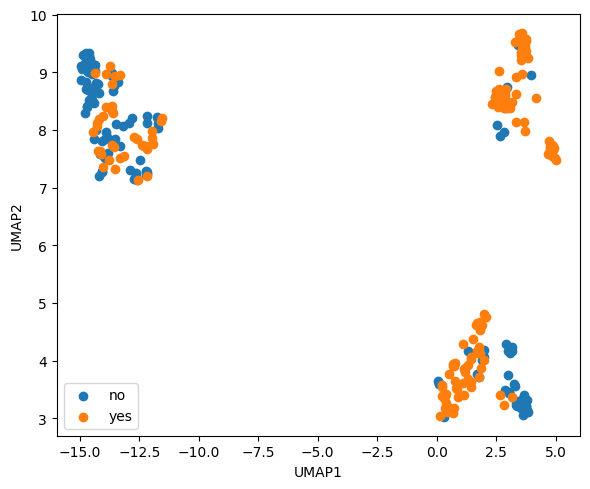

In [21]:
# Plotting UMAP to visualize class separation across samples

# Separating features from the label
X = df_vis.drop(columns=["phage_id", "temperate"]).apply(pd.to_numeric, errors="coerce").fillna(0.0).values
y = df_vis["temperate"].astype(str).str.lower().values

# Scaling features
X = StandardScaler().fit_transform(X)

# Reducing dimensionality with PCA
Xp = PCA(n_components= 10, random_state=0).fit_transform(X)

# Computing the 2D UMAP embedding for visualization
emb = umap.UMAP(n_neighbors=50, min_dist=0.01, metric="cosine", random_state=0).fit_transform(Xp)

# Plotting the UMAP
plt.figure(figsize=(6,5))
plt.scatter(emb[y=="no", 0],  emb[y=="no", 1], label="no")
plt.scatter(emb[y=="yes", 0], emb[y=="yes", 1], label="yes")
plt.legend(); plt.xlabel("UMAP1"); plt.ylabel("UMAP2"); plt.tight_layout(); plt.show()

# Training with known labels

In [22]:
# Defining a function to subset only selected features for training, validation and testing sets

feats = best_feats

def prep(d):
    X = d[feats].apply(pd.to_numeric, errors="coerce").fillna(0.0)
    y = d["temperate"].astype(str).str.lower()
    return X, y

X_train, y_train = prep(train_lab)
X_val,   y_val   = prep(val_lab)
X_test,  y_test  = prep(test_lab)

# DT

Best CV BAC: 0.7952380952380953
Best params: {'criterion': 'gini', 'max_depth': 6, 'min_samples_leaf': 3, 'min_samples_split': 8}
Val BAC: 0.6436335403726708
Test BAC: 0.7374608150470219
              precision    recall  f1-score   support

          no       0.71      0.68      0.70        22
         yes       0.77      0.79      0.78        29

    accuracy                           0.75        51
   macro avg       0.74      0.74      0.74        51
weighted avg       0.74      0.75      0.74        51



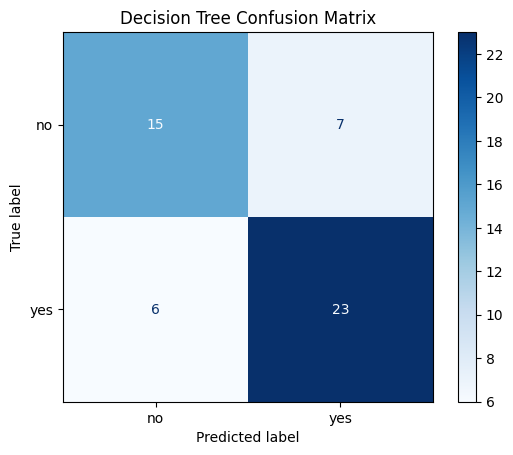

In [55]:
# Defining a parameter grid to loop over
param_grid = {
    "max_depth": range(2, 8),
    "min_samples_leaf": range(1, 10, 2),
    "min_samples_split": range(2, 10, 2),
    "criterion": ["entropy", "gini"],
}

# Initializing grid search cross validation based on parameter grid
gs = GridSearchCV(
    DecisionTreeClassifier(random_state=1),
    param_grid,
    cv=5,
    scoring="balanced_accuracy",
    n_jobs=-1
)

gs.fit(X_train, y_train)

# Identifying best parameters based on cross-validation
print("Best CV BAC:", gs.best_score_)
print("Best params:", gs.best_params_)

# Calculating balanced accuracy score of the validation set
val_pred = gs.best_estimator_.predict(X_val)
print("Val BAC:", balanced_accuracy_score(y_val, val_pred))

# Concatenating training and validation sets for one final training set
X_tv = pd.concat([X_train, X_val])
y_tv = pd.concat([y_train, y_val])

# Training the decision tree model based on the best parameters
best_dt = DecisionTreeClassifier(random_state=1, **gs.best_params_)
best_dt.fit(X_tv, y_tv)

# Calculating balanced accuracy score of the test set
test_pred = best_dt.predict(X_test)
print("Test BAC:", balanced_accuracy_score(y_test, test_pred))
print(classification_report(y_test, test_pred))

# Plotting confusion matrix
ConfusionMatrixDisplay.from_predictions(
    y_test, test_pred, cmap="Blues", values_format="d", display_labels=best_dt.classes_
)
plt.title("Decision Tree Confusion Matrix")
plt.show()

# RF

Fitting 3 folds for each of 25 candidates, totalling 75 fits
Best CV BAC: 0.8986257928118393
Best params: {'n_estimators': 600, 'min_samples_split': 2, 'min_samples_leaf': 1, 'max_features': 0.5, 'max_depth': None}
Val BAC: 0.8633540372670807
Test BAC: 0.8973354231974922
              precision    recall  f1-score   support

          no       0.90      0.86      0.88        22
         yes       0.90      0.93      0.92        29

    accuracy                           0.90        51
   macro avg       0.90      0.90      0.90        51
weighted avg       0.90      0.90      0.90        51



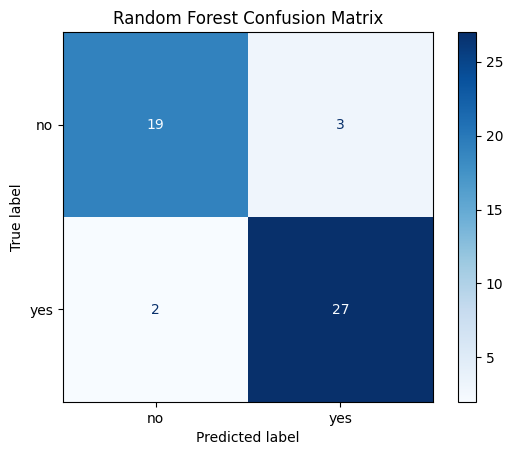

In [56]:
# Defining a parameter grid to loop over
param_dist = {
    "n_estimators": [200, 400, 600],
    "max_depth": [None, 6, 10],
    "min_samples_leaf": [1, 2, 3],
    "min_samples_split": [2, 4, 8],
    "max_features": ["sqrt", 0.5],
}

# Initializing grid search cross validation based on parameter grid
rs = RandomizedSearchCV(
    RandomForestClassifier(random_state=42, n_jobs=-1),
    param_distributions=param_dist,
    n_iter=25,
    cv=3,
    scoring="balanced_accuracy",
    random_state=42,
    n_jobs=-1,
    verbose=1
)
rs.fit(X_train, y_train)

# Identifying best parameters based on cross-validation
print("Best CV BAC:", rs.best_score_)
print("Best params:", rs.best_params_)

# Calculating balanced accuracy score of the validation set
val_pred = rs.best_estimator_.predict(X_val)
print("Val BAC:", balanced_accuracy_score(y_val, val_pred))

# Concatenating training and validation sets for one final training set
X_tv = pd.concat([X_train, X_val])
y_tv = pd.concat([y_train, y_val])

# Training the random forest model based on the best parameters
best_rf = RandomForestClassifier(random_state=42, n_jobs=-1, **rs.best_params_)
best_rf.fit(X_tv, y_tv)

# Calculating balanced accuracy score of the test set
test_pred = best_rf.predict(X_test)
print("Test BAC:", balanced_accuracy_score(y_test, test_pred))
print(classification_report(y_test, test_pred))

# Plotting confusion matrix
ConfusionMatrixDisplay.from_predictions(
    y_test, test_pred, cmap="Blues", values_format="d", display_labels=best_rf.classes_
)
plt.title("Random Forest Confusion Matrix")
plt.show()

# SVM

Fitting 3 folds for each of 12 candidates, totalling 36 fits
Best CV BAC: 0.9107193194402496
Best params: {'kernel': 'rbf', 'gamma': 'scale', 'class_weight': None, 'C': 100}
Val BAC: 0.9107142857142857
Test BAC: 0.9373040752351097
              precision    recall  f1-score   support

          no       0.95      0.91      0.93        22
         yes       0.93      0.97      0.95        29

    accuracy                           0.94        51
   macro avg       0.94      0.94      0.94        51
weighted avg       0.94      0.94      0.94        51



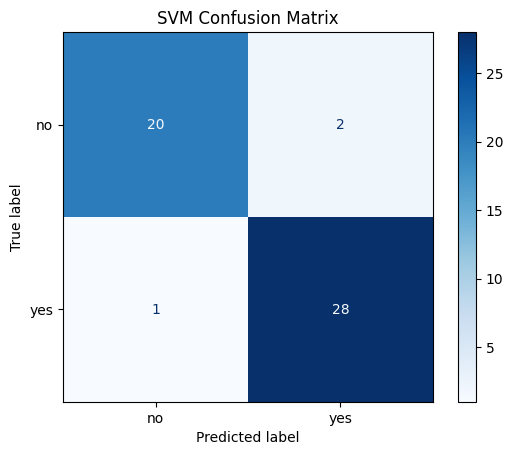

In [57]:
# Scaling data
scaler = StandardScaler()
Xtr = scaler.fit_transform(X_train)
Xva = scaler.transform(X_val)
Xte = scaler.transform(X_test)

# Defining parameters to loop over
param_dist = {
    "C": [0.1, 1, 10, 100],
    "kernel": ["rbf", "linear"],
    "gamma": ["scale", "auto"],
    "class_weight": [None, "balanced"],
}

# Initializing randomized search cross validation based on parameter dictionary
rs = RandomizedSearchCV(
    SVC(),
    param_distributions=param_dist,
    n_iter=12,
    cv=3,
    scoring="balanced_accuracy",
    random_state=42,
    n_jobs=-1,
    verbose=1
)
rs.fit(Xtr, y_train)

# Identifying best parameters based on cross-validation
print("Best CV BAC:", rs.best_score_)
print("Best params:", rs.best_params_)

# Calculating balanced accuracy score of the validation set
val_pred = rs.best_estimator_.predict(Xva)
print("Val BAC:", balanced_accuracy_score(y_val, val_pred))

# Concatenating training and validation sets for one final training set
X_tv = pd.concat([X_train, X_val])
y_tv = pd.concat([y_train, y_val])

# Rescaling concatenated final training set
scaler2 = StandardScaler()
Xtv = scaler2.fit_transform(X_tv)
Xte2 = scaler2.transform(X_test)

# Training the decision tree model based on the best parameters
best_svm = SVC(**rs.best_params_)
best_svm.fit(Xtv, y_tv)

# Calculating balanced accuracy score of the test set
test_pred = best_svm.predict(Xte2)
print("Test BAC:", balanced_accuracy_score(y_test, test_pred))
print(classification_report(y_test, test_pred, labels=best_svm.classes_, target_names=le.classes_))

# Plotting confusion matrix
ConfusionMatrixDisplay.from_predictions(
    y_test, test_pred, cmap="Blues", values_format="d", display_labels=le.classes_
)
plt.title("SVM Confusion Matrix")
plt.show()

# XGBoost

Fitting 3 folds for each of 12 candidates, totalling 36 fits
Best CV BAC: 0.8661783952481628
Best params: {'subsample': 1.0, 'reg_lambda': 5, 'n_estimators': 600, 'min_child_weight': 1, 'max_depth': 2, 'learning_rate': 0.2, 'gamma': 0.3, 'colsample_bytree': 1.0}
Val BAC: 0.8633540372670807
Test BAC: 0.8746081504702194
              precision    recall  f1-score   support

          no       0.90      0.82      0.86        22
         yes       0.87      0.93      0.90        29

    accuracy                           0.88        51
   macro avg       0.89      0.87      0.88        51
weighted avg       0.88      0.88      0.88        51



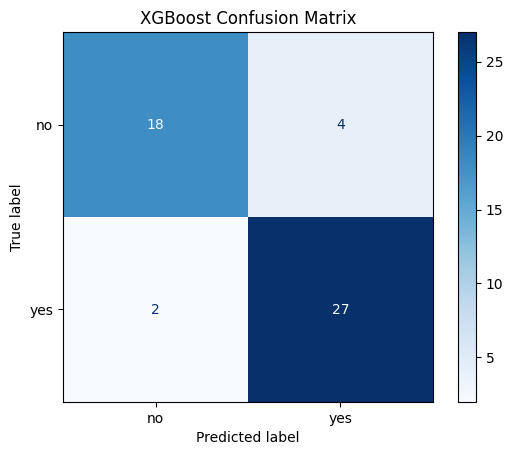

In [58]:
# Encoding 'yes' and 'no' labels to binary labels
le = LabelEncoder()
ytr = le.fit_transform(y_train)
yva = le.transform(y_val)
yte = le.transform(y_test)

# Defining a parameter grid to loop over
param_dist = {
    "n_estimators": [200, 400, 600],
    "max_depth": [2, 3, 4, 6],
    "learning_rate": [0.01, 0.05, 0.1, 0.2],
    "subsample": [0.7, 0.9, 1.0],
    "colsample_bytree": [0.7, 0.9, 1.0],
    "min_child_weight": [1, 3, 5],
    "gamma": [0, 0.1, 0.3],
    "reg_lambda": [1, 5, 10],
}

# Initializing grid search based on parameter grid
rs = RandomizedSearchCV(
    XGBClassifier(objective="binary:logistic", eval_metric="logloss", random_state=42, n_jobs=-1),
    param_distributions=param_dist,
    n_iter=12,
    cv=3,
    scoring="balanced_accuracy",
    random_state=42,
    n_jobs=-1,
    verbose=1
)
rs.fit(X_train, ytr)

# Identifying best parameters based on cross-validation
print("Best CV BAC:", rs.best_score_)
print("Best params:", rs.best_params_)

# Calculating balanced accuracy score of the validation set
val_pred = rs.best_estimator_.predict(X_val)
print("Val BAC:", balanced_accuracy_score(yva, val_pred))

# Concatenating training and validation sets for one final training set
X_tv = pd.concat([X_train, X_val])
y_tv = pd.concat([y_train, y_val])
ytv = le.fit_transform(y_tv)

# Training the decision tree model based on the best parameters
best_xgb = XGBClassifier(
    objective="binary:logistic",
    eval_metric="logloss",
    random_state=42,
    n_jobs=-1,
    **rs.best_params_
)
best_xgb.fit(X_tv, ytv)

# Calculating balanced accuracy score of the test set
test_pred = best_xgb.predict(X_test)
print("Test BAC:", balanced_accuracy_score(yte, test_pred))
print(classification_report(yte, test_pred, target_names=le.classes_))

# Plotting confusion matrix
ConfusionMatrixDisplay.from_predictions(
    yte, test_pred, cmap="Blues", values_format="d", display_labels=le.classes_
)
plt.title("XGBoost Confusion Matrix")
plt.show()

# Label Spreading

In [23]:
# Subsetting training and testing sets to include chosen features only
cols_keep = ["phage_id", "temperate"] + best_feats
train_sub = train_lab[cols_keep].copy()
val_sub   = val_lab[cols_keep].copy()
unlab_sub = unlabeled[cols_keep].copy()

# Concatenating labeled training and unlabeled subsets to initialize semi-supervised clustering
df_ls = pd.concat([train_sub, unlab_sub], ignore_index=True)

# Subsetting only feature columns
feat_cols = [c for c in df_ls.columns if c not in ["phage_id", "temperate"]]
X = df_ls[feat_cols].apply(pd.to_numeric, errors="coerce").fillna(0).values

# Identifying ground truth labels from labels to be predicted using a mask
mask_lab = df_ls["temperate"].notna().values

# Encoding 'yes' and 'no' labels to binary labels
le = LabelEncoder()
y = np.full(len(df_ls), -1, dtype=int)
y[mask_lab] = le.fit_transform(df_ls.loc[mask_lab, "temperate"].astype(str).str.lower())

# Scaling data before dimensionality reduction
scaler = StandardScaler()
X_s = scaler.fit_transform(X)

# Reducing dimentionality using PCA
pca = PCA(n_components=50, random_state=0)
Xp = pca.fit_transform(X_s)

# Fitting the label spreading model to our data
ls = LabelSpreading(kernel="knn", n_neighbors=50, alpha=0.2)
ls.fit(Xp, y)

# Validating the model by calculating balanced accuracy score of the validation set
Xv = val_sub[feat_cols].apply(pd.to_numeric, errors="coerce").fillna(0).values
Xv_p = pca.transform(scaler.transform(Xv))
y_val = le.transform(val_sub["temperate"].astype(str).str.lower())
val_pred = ls.predict(Xv_p)
print("Val BAC:", balanced_accuracy_score(y_val, val_pred))
print(classification_report(y_val, val_pred, target_names=le.classes_))

# Setting confidence threshold for predicted labels
thr = 0.8
mask_unl = ~mask_lab
proba_u  = ls.label_distributions_[mask_unl]
conf_u   = proba_u.max(axis=1)
pred_u   = le.inverse_transform(proba_u.argmax(axis=1))

# Keeping only labels above confidence threshold
keep_u = conf_u >= thr

# Calculating unlabeled and pseudo-labeled (predicted) samples
print("Unlabeled total:", mask_unl.sum())
print("Pseudo-labeled kept:", keep_u.sum())
print("Kept label counts:", dict(zip(*np.unique(pred_u[keep_u], return_counts=True))))

# Adding final labels and confidence scores to the unlabeled dataframe
unlab_sub["pred_temperate"] = pred_u
unlab_sub["pred_conf"] = conf_u
unlab_sub["final_label"] = np.where(keep_u, pred_u, np.nan)


Val BAC: 0.8315217391304348
              precision    recall  f1-score   support

          no       0.75      0.91      0.82        23
         yes       0.91      0.75      0.82        28

    accuracy                           0.82        51
   macro avg       0.83      0.83      0.82        51
weighted avg       0.84      0.82      0.82        51

Unlabeled total: 6819
Pseudo-labeled kept: 5285
Kept label counts: {'no': np.int64(3643), 'yes': np.int64(1642)}


# Semi-supervised clustering



/usr/local/lib/python3.12/dist-packages/umap/umap_.py:1952: UserWarning: n_jobs value 1 overridden to 1 by setting random_state. Use no seed for parallelism.
  warn(


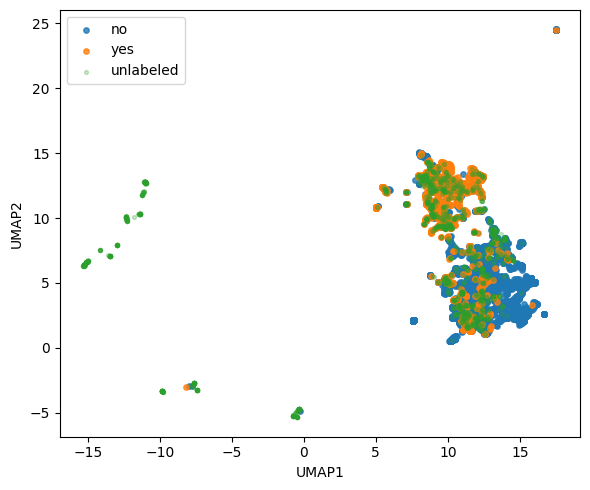

In [27]:
# Using the same selected feature set from the correlation-based feature selection step
feats = best_feats

# Combining the training and validation subsetsto represent the known labels (ground truth)
known = pd.concat([train_lab, val_lab], ignore_index=True).copy()

# Creating a grouping column that stores the ground truth class for each known sample
known["group"] = known["temperate"].astype(str).str.lower()

u = unlab_sub.copy()

# Assigning a group label for the unlabeled samples
u["group"] = np.where(
    u["final_label"].notna(),
    u["final_label"].astype(str).str.lower(),
    "unlabeled"
)

# Concatenating known and unknown samples to visulalize
df_vis = pd.concat(
    [
        known[["phage_id", "temperate", "group"] + feats],
        u[["phage_id", "temperate", "group"] + feats],
    ],
    ignore_index=True
)

# Extracting features only from the dataframe
X = df_vis.drop(columns=["phage_id", "temperate", "group"]).apply(
    pd.to_numeric, errors="coerce"
).fillna(0.0).values

# Extracting the visualization labels
g = df_vis["group"].values

# Scaling features
X = StandardScaler().fit_transform(X)

# Reducing dimensionality with PCA
Xp = PCA(n_components=10, random_state=0).fit_transform(X)

# Computing the 2D UMAP embedding for visualization
emb = umap.UMAP(
    n_neighbors=50, min_dist=0.01, metric="cosine", random_state=0
).fit_transform(Xp)

# Plotting the UMAP
plt.figure(figsize=(6, 5))
plt.scatter(emb[g == "no", 0], emb[g == "no", 1], s=15, alpha=0.8, label="no")
plt.scatter(emb[g == "yes", 0], emb[g == "yes", 1], s=15, alpha=0.8, label="yes")
plt.scatter(
    emb[g == "unlabeled", 0],
    emb[g == "unlabeled", 1],
    s=8,
    alpha=0.25,
    label="unlabeled",
)

plt.legend()
plt.xlabel("UMAP1")
plt.ylabel("UMAP2")
plt.tight_layout()
plt.show()

# Training with predicted labels

In [65]:
# Defining a function to subset only selected features for training, validation and testing sets

feats = best_feats

pseudo = unlab_sub[unlab_sub["final_label"].notna()].copy()
pseudo["temperate"] = pseudo["final_label"]

def prep_xy(d):
    X = d[feats].apply(pd.to_numeric, errors="coerce").fillna(0.0)
    y = d["temperate"].astype(str).str.lower()
    return X, y

# Concatenating original training set and predicted labels (pseudo) set
train_mix = pd.concat([train_lab, pseudo], ignore_index=True)

X_train, y_train = prep_xy(train_mix)
X_val,   y_val   = prep_xy(val_lab)
X_test,  y_test  = prep_xy(test_lab)

# DT

Best CV BAC: 0.8962274592270875
Best params: {'criterion': 'entropy', 'max_depth': 7, 'min_samples_leaf': 1, 'min_samples_split': 4}
Val BAC: 0.8711180124223603
Test BAC: 0.8346394984326019
              precision    recall  f1-score   support

          no       0.85      0.77      0.81        22
         yes       0.84      0.90      0.87        29

    accuracy                           0.84        51
   macro avg       0.84      0.83      0.84        51
weighted avg       0.84      0.84      0.84        51



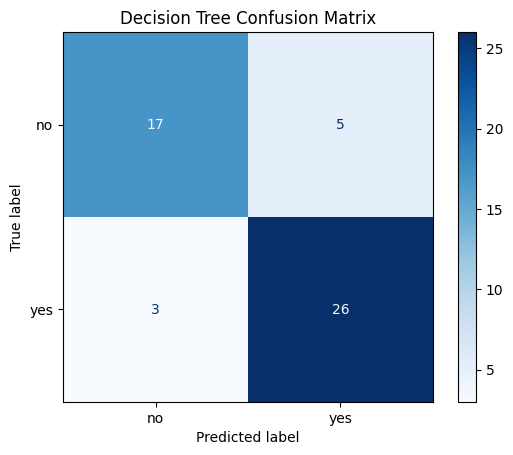

In [66]:
# Defining a parameter grid to loop over
param_grid = {
    "max_depth": range(2, 8),
    "min_samples_leaf": range(1, 10, 2),
    "min_samples_split": range(2, 10, 2),
    "criterion": ["entropy", "gini"],
}

# Initializing grid search cross validation based on parameter grid
gs = GridSearchCV(
    DecisionTreeClassifier(random_state=1),
    param_grid,
    cv=5,
    scoring="balanced_accuracy",
    n_jobs=-1
)

gs.fit(X_train, y_train)

# Identifying best parameters based on cross-validation
print("Best CV BAC:", gs.best_score_)
print("Best params:", gs.best_params_)

# Calculating balanced accuracy score of the validation set
val_pred = gs.best_estimator_.predict(X_val)
print("Val BAC:", balanced_accuracy_score(y_val, val_pred))

# Concatenating training and validation sets for one final training set
X_tv = pd.concat([X_train, X_val])
y_tv = pd.concat([y_train, y_val])

# Training the decision tree model based on the best parameters
best_dt = DecisionTreeClassifier(random_state=1, **gs.best_params_)
best_dt.fit(X_tv, y_tv)

# Calculating balanced accuracy score of the test set
test_pred = best_dt.predict(X_test)
print("Test BAC:", balanced_accuracy_score(y_test, test_pred))
print(classification_report(y_test, test_pred))

# Plotting confusion matrix
ConfusionMatrixDisplay.from_predictions(
    y_test, test_pred, cmap="Blues", values_format="d", display_labels=best_dt.classes_
)
plt.title("Decision Tree Confusion Matrix")
plt.show()

# RF

Fitting 3 folds for each of 25 candidates, totalling 75 fits
Best CV BAC: 0.9414026624720196
Best params: {'n_estimators': 600, 'min_samples_split': 2, 'min_samples_leaf': 1, 'max_features': 0.5, 'max_depth': None}
Val BAC: 0.9068322981366459
Test BAC: 0.8855799373040751
              precision    recall  f1-score   support

          no       0.83      0.91      0.87        22
         yes       0.93      0.86      0.89        29

    accuracy                           0.88        51
   macro avg       0.88      0.89      0.88        51
weighted avg       0.89      0.88      0.88        51



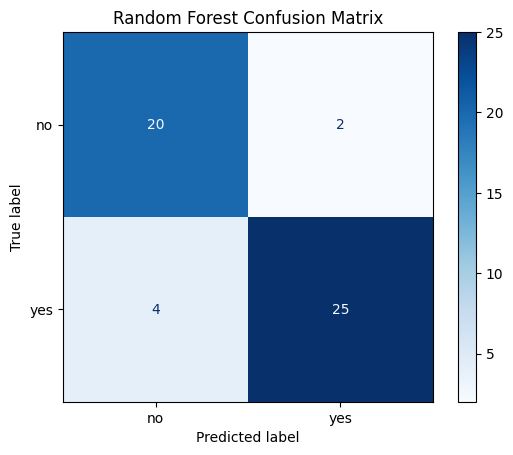

In [67]:
# Defining a parameter grid to loop over
param_dist = {
    "n_estimators": [200, 400, 600],
    "max_depth": [None, 6, 10],
    "min_samples_leaf": [1, 2, 3],
    "min_samples_split": [2, 4, 8],
    "max_features": ["sqrt", 0.5],
}

# Initializing grid search cross validation based on parameter grid
rs = RandomizedSearchCV(
    RandomForestClassifier(random_state=42, n_jobs=-1),
    param_distributions=param_dist,
    n_iter=25,
    cv=3,
    scoring="balanced_accuracy",
    random_state=42,
    n_jobs=-1,
    verbose=1
)
rs.fit(X_train, y_train)

# Identifying best parameters based on cross-validation
print("Best CV BAC:", rs.best_score_)
print("Best params:", rs.best_params_)

# Calculating balanced accuracy score of the validation set
val_pred = rs.best_estimator_.predict(X_val)
print("Val BAC:", balanced_accuracy_score(y_val, val_pred))

# Concatenating training and validation sets for one final training set
X_tv = pd.concat([X_train, X_val])
y_tv = pd.concat([y_train, y_val])

# Training the random forest model based on the best parameters
best_rf = RandomForestClassifier(random_state=42, n_jobs=-1, **rs.best_params_)
best_rf.fit(X_tv, y_tv)

# Calculating balanced accuracy score of the test set
test_pred = best_rf.predict(X_test)
print("Test BAC:", balanced_accuracy_score(y_test, test_pred))
print(classification_report(y_test, test_pred))

# Plotting confusion matrix
ConfusionMatrixDisplay.from_predictions(
    y_test, test_pred, cmap="Blues", values_format="d", display_labels=best_rf.classes_
)
plt.title("Random Forest Confusion Matrix")
plt.show()

# SVM

Fitting 3 folds for each of 12 candidates, totalling 36 fits
Best CV BAC: 0.9588319964779073
Best params: {'kernel': 'rbf', 'gamma': 'auto', 'class_weight': 'balanced', 'C': 100}
Val BAC: 0.9107142857142857
Test BAC: 0.908307210031348
              precision    recall  f1-score   support

          no       0.84      0.95      0.89        22
         yes       0.96      0.86      0.91        29

    accuracy                           0.90        51
   macro avg       0.90      0.91      0.90        51
weighted avg       0.91      0.90      0.90        51



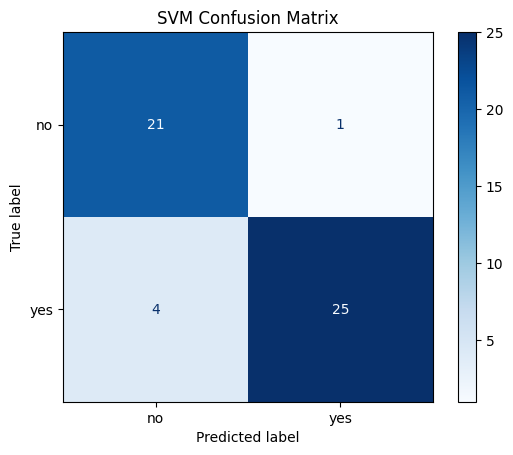

In [68]:
# Scaling data
scaler = StandardScaler()
Xtr = scaler.fit_transform(X_train)
Xva = scaler.transform(X_val)
Xte = scaler.transform(X_test)

# Defining parameters to loop over
param_dist = {
    "C": [0.1, 1, 10, 100],
    "kernel": ["rbf", "linear"],
    "gamma": ["scale", "auto"],
    "class_weight": [None, "balanced"],
}

# Initializing randomized search cross validation based on parameter dictionary
rs = RandomizedSearchCV(
    SVC(),
    param_distributions=param_dist,
    n_iter=12,
    cv=3,
    scoring="balanced_accuracy",
    random_state=42,
    n_jobs=-1,
    verbose=1
)
rs.fit(Xtr, y_train)

# Identifying best parameters based on cross-validation
print("Best CV BAC:", rs.best_score_)
print("Best params:", rs.best_params_)

# Calculating balanced accuracy score of the validation set
val_pred = rs.best_estimator_.predict(Xva)
print("Val BAC:", balanced_accuracy_score(y_val, val_pred))

# Concatenating training and validation sets for one final training set
X_tv = pd.concat([X_train, X_val])
y_tv = pd.concat([y_train, y_val])

# Rescaling concatenated final training set
scaler2 = StandardScaler()
Xtv = scaler2.fit_transform(X_tv)
Xte2 = scaler2.transform(X_test)

# Training the decision tree model based on the best parameters
best_svm = SVC(**rs.best_params_)
best_svm.fit(Xtv, y_tv)

# Calculating balanced accuracy score of the test set
test_pred = best_svm.predict(Xte2)
print("Test BAC:", balanced_accuracy_score(y_test, test_pred))
print(classification_report(y_test, test_pred, labels=best_svm.classes_, target_names=le.classes_))

# Plotting confusion matrix
ConfusionMatrixDisplay.from_predictions(
    y_test, test_pred, cmap="Blues", values_format="d", display_labels=le.classes_
)
plt.title("SVM Confusion Matrix")
plt.show()

# XGBoost

Fitting 3 folds for each of 12 candidates, totalling 36 fits
Best CV BAC: 0.9575716517737979
Best params: {'subsample': 1.0, 'reg_lambda': 5, 'n_estimators': 600, 'min_child_weight': 1, 'max_depth': 2, 'learning_rate': 0.2, 'gamma': 0.3, 'colsample_bytree': 1.0}
Val BAC: 0.9068322981366459
Test BAC: 0.908307210031348
              precision    recall  f1-score   support

          no       0.84      0.95      0.89        22
         yes       0.96      0.86      0.91        29

    accuracy                           0.90        51
   macro avg       0.90      0.91      0.90        51
weighted avg       0.91      0.90      0.90        51



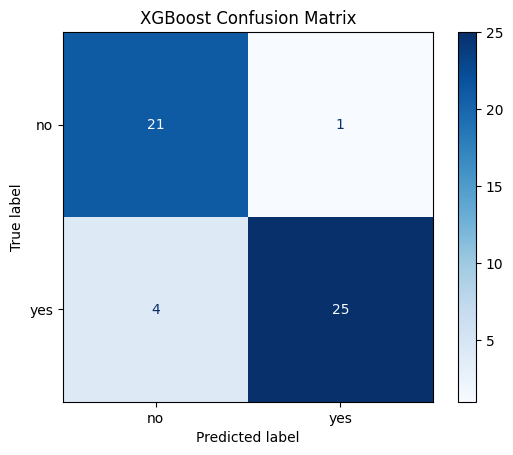

In [69]:
# Encoding 'yes' and 'no' labels to binary labels
le = LabelEncoder()
ytr = le.fit_transform(y_train)
yva = le.transform(y_val)
yte = le.transform(y_test)

# Defining a parameter grid to loop over
param_dist = {
    "n_estimators": [200, 400, 600],
    "max_depth": [2, 3, 4, 6],
    "learning_rate": [0.01, 0.05, 0.1, 0.2],
    "subsample": [0.7, 0.9, 1.0],
    "colsample_bytree": [0.7, 0.9, 1.0],
    "min_child_weight": [1, 3, 5],
    "gamma": [0, 0.1, 0.3],
    "reg_lambda": [1, 5, 10],
}

# Initializing grid search based on parameter grid
rs = RandomizedSearchCV(
    XGBClassifier(objective="binary:logistic", eval_metric="logloss", random_state=42, n_jobs=-1),
    param_distributions=param_dist,
    n_iter=12,
    cv=3,
    scoring="balanced_accuracy",
    random_state=42,
    n_jobs=-1,
    verbose=1
)
rs.fit(X_train, ytr)

# Identifying best parameters based on cross-validation
print("Best CV BAC:", rs.best_score_)
print("Best params:", rs.best_params_)

# Calculating balanced accuracy score of the validation set
val_pred = rs.best_estimator_.predict(X_val)
print("Val BAC:", balanced_accuracy_score(yva, val_pred))

# Concatenating training and validation sets for one final training set
X_tv = pd.concat([X_train, X_val])
y_tv = pd.concat([y_train, y_val])
ytv = le.fit_transform(y_tv)

# Training the decision tree model based on the best parameters
best_xgb = XGBClassifier(
    objective="binary:logistic",
    eval_metric="logloss",
    random_state=42,
    n_jobs=-1,
    **rs.best_params_
)
best_xgb.fit(X_tv, ytv)

# Calculating balanced accuracy score of the test set
test_pred = best_xgb.predict(X_test)
print("Test BAC:", balanced_accuracy_score(yte, test_pred))
print(classification_report(yte, test_pred, target_names=le.classes_))

# Plotting confusion matrix
ConfusionMatrixDisplay.from_predictions(
    yte, test_pred, cmap="Blues", values_format="d", display_labels=le.classes_
)
plt.title("XGBoost Confusion Matrix")
plt.show()